# Capstone Project Module 3 Purwadhika

## Problem Background

Capital Bikeshare (CaBi) serves Washington, D.C., and parts of its metropolitan area, operating over 700 stations and managing a fleet of 5,400 bikes as of January 2023. These automated bike rentals enhance urban mobility, reduce environmental impact, and promote health. Since its launch in 2010, CaBi has generated a wealth of data on user behavior and traffic patterns, offering invaluable insights for urban planning and transportation optimization.

Despite its success, CaBi faces challenges in efficiently managing its extensive network of stations and bikes. The unpredictable nature of bike demand, influenced by variables such as weather conditions, time of day, and seasonal changes, complicates resource allocation. Without accurate demand forecasting, the system risks overstocking or understocking bikes at various locations, leading to operational inefficiencies, diminished user satisfaction, and missed opportunities to enhance urban mobility. 

*This project aims to address these challenges by leveraging machine learning to develop robust predictive models for bikesharing demand.*

## Proposed Analysis

Based on the column description of the dataset, we have a target variable. Therefore this project will used a supervised machine learning algorithm, particularly regression models to predict bike rental demands, following these steps:

1. Data Understanding and Cleaning: Analyze the dataset to identify and address missing values, duplicates, and incorrect data types. Ensure the data is cleaned and prepared for analysis by handling these issues effectively.

2. Feature and Target Selection: Identify the target variable (y) and the predictor variables (X) for the model. Selecting relevant features is key to improving model performance.

3. Data Splitting: Divide the dataset into training and testing sets, typically in an 80/20 ratio, to train the model and evaluate its performance.

4. Preprocessing: Prepare the data for modeling by scaling, encoding categorical variables, and addressing outliers as needed.

5. Cross-Validation: Use cross-validation to assess different models or parameter settings, ensuring robust model selection based on performance across multiple data splits.

6. Hyperparameter Optimization: Apply Bayesian Optimization to fine-tune model parameters for optimal performance, guided by cross-validation results.

7. Model Evaluation: Assess the model’s accuracy on the test set using metrics like RMSE, MAE, and MAPE to gauge prediction quality.

8. Conclusions: Present key findings, summarize model performance, and highlight insights from the analysis.

9. Recommendations: Offer actionable advice to stakeholders, focusing on optimizing station operations, balancing bike availability, and enhancing overall service efficiency.

## Data Understanding and Data Cleaning

### Import Library

In [1]:
# importing necessary library for data cleaning and data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# other
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

#### Column Description

| Feature      | Description                                                                                           |
|--------------|-------------------------------------------------------------------------------------------------------|
| **dteday**   | Date                                                                                                  |
| **season**   | Season (1: winter, 2: spring, 3: summer, 4: fall)                                                     |
| **hr**       | Hour (0 to 23)                                                                                        |
| **holiday**  | Whether the day is a holiday (0: No, 1: Yes)                                                          |
| **temp**     | Normalized temperature in Celsius. Values derived via (t-tmin)/(tmax-tmin) where tmin=-8°C, tmax=+39°C (Hourly scale) |
| **atemp**    | Normalized feeling temperature in Celsius. Values derived via (t-tmin)/(tmax-tmin) where tmin=-16°C, tmax=+50°C (Hourly scale) |
| **hum**      | Normalized humidity. Values divided by 100 (maximum)                                                  |
| **casual**   | Count of casual users                                                                                 |
| **registered** | Count of registered users                                                                          |
| **cnt**      | Count of total rental bikes including both casual and registered users                                |
| **weathersit** | Weather situation:                                                                                 |
|              | 1: Clear, Few clouds, Partly cloudy                                                                   |
|              | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds                                             |
|              | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds                                           |
|              | 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog                                         |


In [2]:
df_bs = pd.read_csv('data_bike_sharing.csv')
df_bs.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [3]:
df_bs.shape

(12165, 11)

In [4]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


### Converting Data Types and Extracting Features

In [5]:
df_bs["dteday"] = pd.to_datetime(df_bs["dteday"])
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [6]:
df_bs["dteday"].nunique()

731

Since the dteday column includes 731 unique values, which is fairly extensive, we’ll streamline the process by breaking it into separate columns for year, month, and day. This approach will enhance manageability and improve its utility for modeling.

In [7]:
df_bs["year"] = df_bs["dteday"].dt.year
df_bs["month"] = df_bs["dteday"].dt.month.astype("category")
df_bs["day"] = df_bs["dteday"].dt.day_name().astype("category")

### Removing and Renaming Columns 

As the dteday column has already been divided, and the values in the casual and registered columns are included in cnt (their combined total), we will remove those columns. Additionally, we’ll rename certain columns to simplify referencing in the upcoming analysis.

In [8]:
# Renaming unncessary columns
df_bs.drop(columns=["dteday", "casual", "registered"], inplace=True)
df_bs.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.5152,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.6212,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.3485,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.6970,0.76,18,857,2012,7,Tuesday


In [9]:
# Rename the columns to make it easier to understand
df_bs = df_bs.rename(columns={
    "hum": "humidity",
    "weathersit": "weather",
    "atemp": "feel_temp",
    "hr": "hour",
    "cnt": "count"
})
df_bs.head()

,humidity,weather,holiday,season,feel_temp,temp,hour,count,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.5152,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.6212,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.3485,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.6970,0.76,18,857,2012,7,Tuesday


### Dataframe Statistic Description

In [10]:
df_bs.describe()

,humidity,weather,holiday,season,feel_temp,temp,hour,count,year
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023,2011.501932
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903,0.500017
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000,2011.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000,2011.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000,2012.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000,2012.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000,2012.000000


*Statistical Description Interpretation:*

- humidity (hum):
    - Represents normalized humidity (values divided by 100). A minimum value of 0 indicates 0% relative humidity, which is practically impossible in Washington, D.C., or its metropolitan area. This suggests:
        - Data Issue: The value of 0 might be due to sensor errors, missing value imputation, or incorrect data processing.
        - Actionable Insight: These instances should be flagged for validation or treated as missing data, as Washington, D.C., typically experiences humidity levels well above 0%.

- weather (weathersit):
    - Categorical variable describing weather conditions.
    - Mean value of 1.42 indicates a predominance of clear or lightly cloudy weather (category 1). Occurrences of extreme weather (category 4) are rare, as reflected in the maximum value of 4.

- holiday:
    - Binary variable indicating holidays.
    - The mean of 0.03 suggests most observations are from non-holiday periods, which aligns with typical data collection that emphasizes regular urban mobility trends.

- season:
    - Categorical variable indicating seasons.
    - Mean of 2.49 suggests even representation across all seasons (1: winter, 4: fall).

- feel_temp (atemp) and temp:
    - Normalized temperature and "feels-like" temperature derived using defined scaling methods.
    - Means of ~0.48–0.50 align with moderate temperatures typical of Washington, D.C. Hourly data ensures fluctuations over the day are captured.
    - Minimum and maximum values reflect normalized scaling, ensuring all entries fall within the expected range (0–1).

- hour (hr):
    - Hourly data ranges from 0 (midnight) to 23 (11 PM), with a mean of ~11.5 indicating balanced distribution across the day.

- count (cnt):
    - Total bike rentals (sum of casual and registered users).
    - Mean of 189 rentals per hour with a maximum of 970 suggests demand variability, likely influenced by weather, time, and other factors.
    - The high standard deviation (181.22) indicates significant variability in hourly demand.

- year:
    - Data spans 2011 and 2012.
    - A mean of ~2011.5 reflects balanced data distribution across both years.


*Updated Observations*
1. Unrealistic humidity Values:
    - The minimum value of 0 for humidity is likely erroneous given the context. This should be addressed during data cleaning.

2. Weather's Impact on Demand:
    - The predominance of clear or lightly cloudy conditions aligns with higher bike usage. Extreme weather conditions (category 4) are rare but should be analyzed for their impact on demand.

3. Temperature and Hourly Fluctuations:
    - The normalized temperature variables capture hourly variations, essential for identifying peak and off-peak bike usage.

4. Seasonal Trends:
    - Equal representation across seasons provides a robust basis for exploring seasonal trends in demand.

5. Demand Patterns:
    - The high variability in count highlights the need for machine learning models to accurately predict demand based on influencing factors like weather and time.

### Handling Anomalies and Duplicate Data

In [11]:
df_bs = df_bs[df_bs["humidity"] != 0]

In [12]:
df_bs[df_bs["humidity"] == 0]

,humidity,weather,holiday,season,feel_temp,temp,hour,count,year,month,day


In [13]:
df_bs.duplicated().sum()

1

In [14]:
df_bs.drop_duplicates(inplace=True)
df_bs.shape

(12150, 11)

In [15]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12150 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   humidity   12150 non-null  float64 
 1   weather    12150 non-null  int64   
 2   holiday    12150 non-null  int64   
 3   season     12150 non-null  int64   
 4   feel_temp  12150 non-null  float64 
 5   temp       12150 non-null  float64 
 6   hour       12150 non-null  int64   
 7   count      12150 non-null  int64   
 8   year       12150 non-null  int32   
 9   month      12150 non-null  category
 10  day        12150 non-null  category
dtypes: category(2), float64(3), int32(1), int64(5)
memory usage: 926.1 KB


Following the removal of unnecessary columns, correction of anomalies, and elimination of duplicate data, the dataset now contains 12,150 rows and 11 columns, comprising 9 numeric columns and 2 categorical columns.

### Dataset Distribution and Outliers

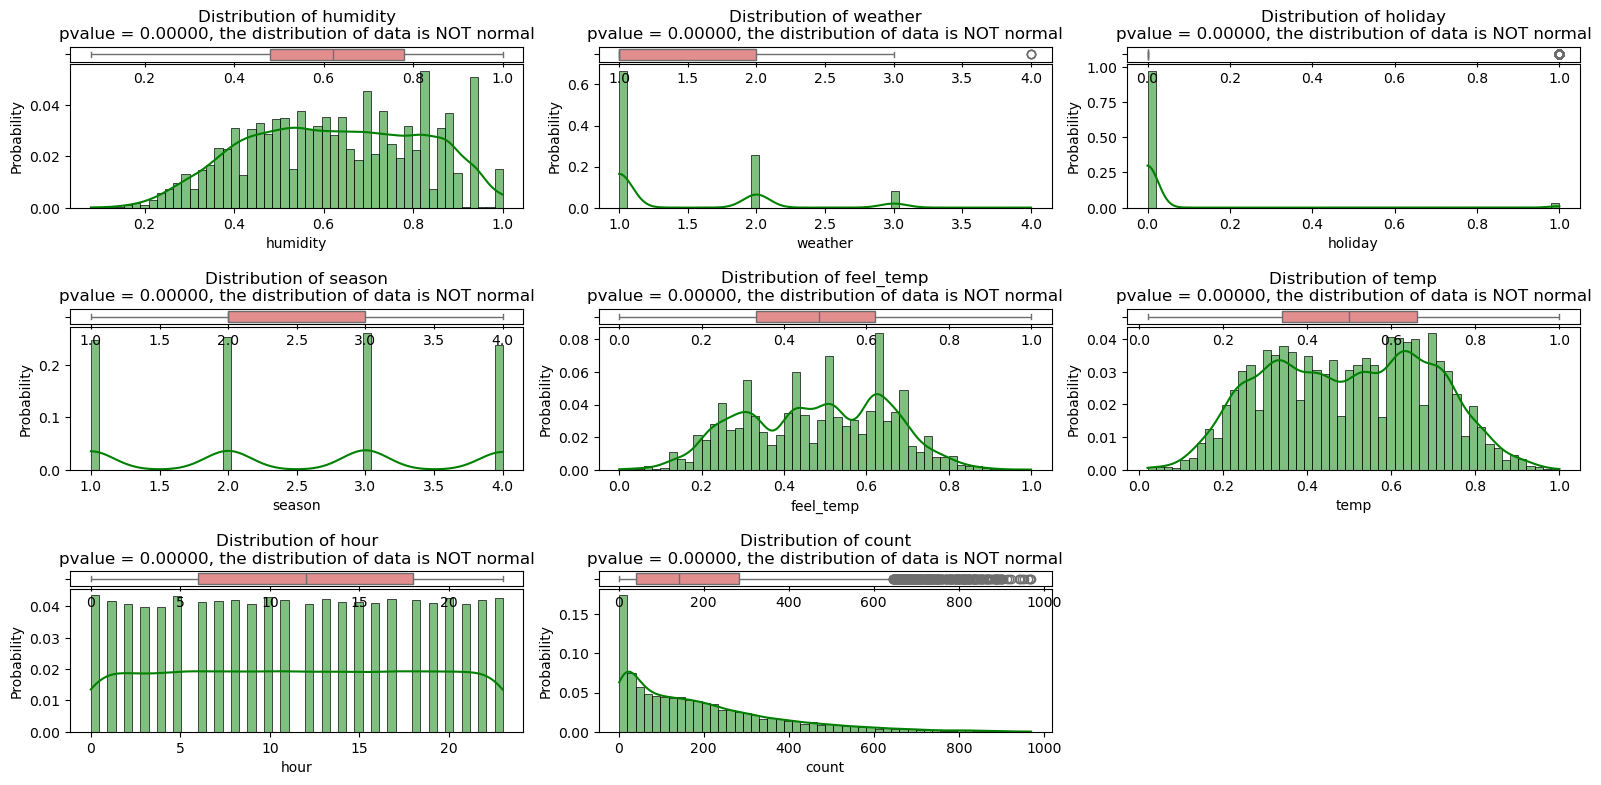

In [16]:
# Checking distribution and outliers
from scipy.stats import normaltest
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df_bs.select_dtypes(include=["number"])

fig, axes = plt.subplots(3, 3, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_features):
    stat, pvalue = normaltest(df_bs[column].dropna())  # Normality test

    if pvalue > 0.05:
        distribution = f"pvalue = {pvalue:.5f}, the distribution of data is normal"
    else:
        distribution = f"pvalue = {pvalue:.5f}, the distribution of data is NOT normal"

    axes[i].set_title(f"Distribution of {column}\n{distribution}")

    # Use a valid Matplotlib color name or hexadecimal code
    sns.histplot(data=df_bs[column], ax=axes[i], kde=True, bins=50, color='green', stat="probability")  # Changed color to 'teal'
    # Alternatively, you could use a hexadecimal code like '#008080'

    ax_box = axes[i].inset_axes([0, 1.02, 1, 0.1])
    sns.boxplot(x=df_bs[column], ax=ax_box, color='lightcoral')  # Set boxplot color to red
    ax_box.set(xlabel="")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

The histograms show that none of the features are normally distributed (p-value = 0.00000). Categorical features like weather, season, and holiday should be encoded appropriately, while numerical features like humidity, feel_temp, and count exhibit significant skewness and may benefit from transformations (e.g., log or box-cox) to improve model performance. Time-based features like hour are uniformly distributed and could be transformed into cyclic features (sine/cosine). Address potential data quality issues, such as extreme values in humidity, and analyze the impact of imbalanced categories like holiday on the target variable.

### Exploratory Data Analysis

#### Barplot

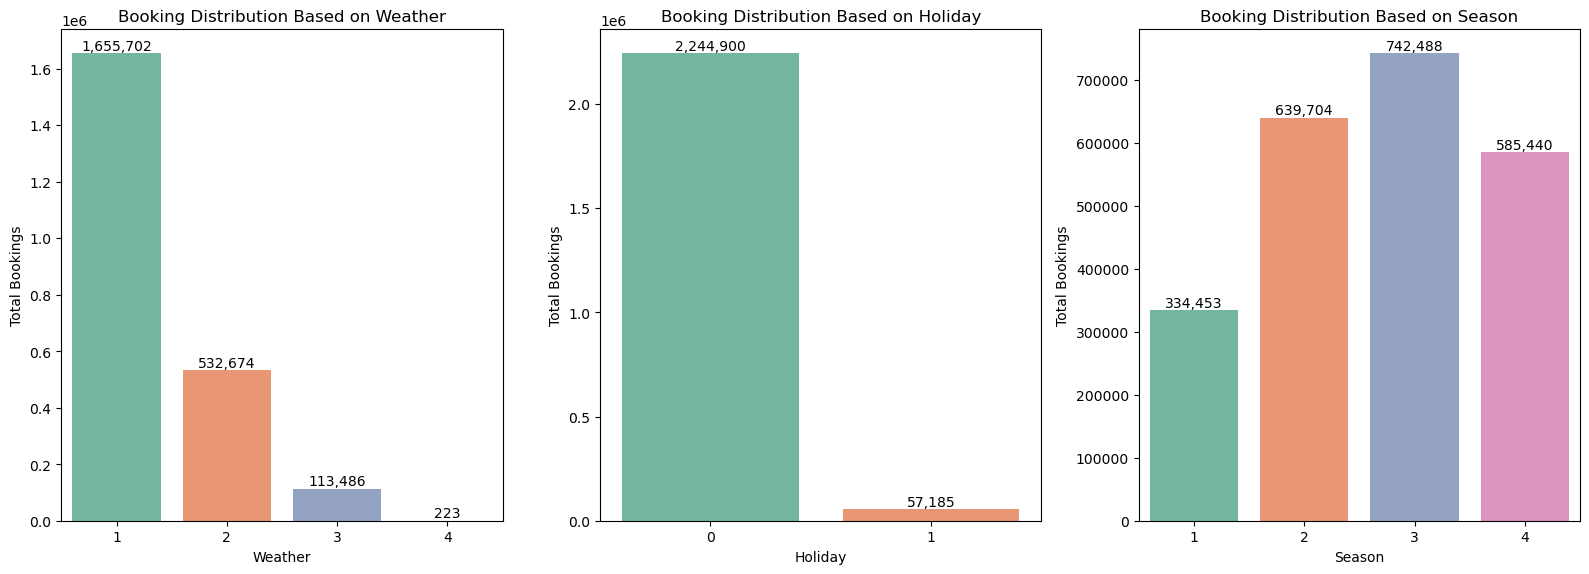

In [17]:
# Distribution of booking based on weather, holiday, and season
import seaborn as sns
import matplotlib.pyplot as plt

# Features to visualize
features = ["weather", "holiday", "season"]

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, feature in enumerate(features):
    # Calculate the sum of 'count' for each category of the feature
    grouped_data = df_bs.groupby(feature)['count'].sum().reset_index()

    # Create the bar plot
    sns.barplot(data=grouped_data, x=feature, y="count", ax=axes[i], ci=None, palette='Set2')

    # Set title and labels
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Total Bookings')  # Added y-label
    axes[i].set_title(f"Booking Distribution Based on {feature.capitalize()}")  # Improved title format

    # Add labels to the bars
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(
            p.get_x() + p.get_width() / 2, 
            height, 
            f'{int(height):,}',  # Format the number with commas
            ha='center', 
            va='bottom', 
            color='black', 
            fontsize=10
        )

plt.tight_layout()
plt.show()

The bar charts provide insights into booking distributions:

1. Weather: The majority of bookings occur during clear weather (category 1), totaling 1,655,702, followed by cloudy (532,674) and rainy conditions (113,486). Very few bookings are made during extreme weather (223).
Recommendation: Focus marketing efforts during clear and cloudy weather, as they dominate booking activity.

2. Holiday: Non-holiday periods see significantly higher bookings (2,244,900) compared to holidays (57,185).
Recommendation: Develop targeted promotions for holiday periods to increase bookings during these times.

3. Season: The highest bookings occur in season 3 (742,488), followed by season 2 (639,704), season 4 (585,440), and season 1 (334,453).
Recommendation: Allocate resources and plan campaigns to capitalize on peak booking seasons (seasons 2 and 3).

This analysis suggests opportunities to improve demand forecasting and revenue management strategies.

#### Heatmap

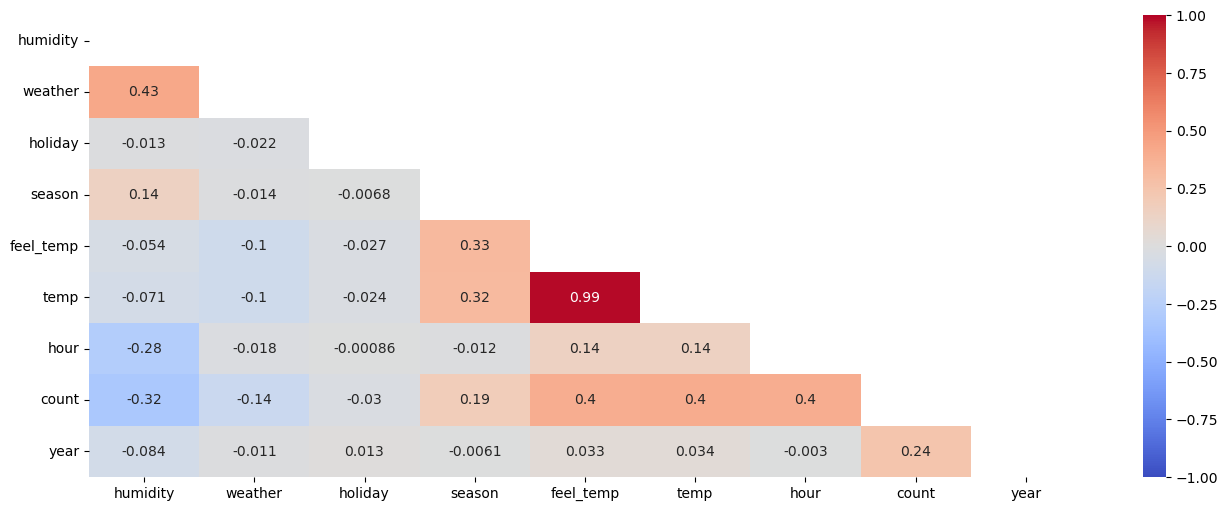

In [18]:
mask = np.triu(df_bs.corr(numeric_only=True))
plt.figure(figsize=(16,6))
sns.heatmap(data=df_bs.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask, vmax=1, center=0, vmin=-1)
plt.show()


The target column, count, does not show a strong correlation with other features. The highest correlations are found with feel_temp, temp, and hour, all of which display a positive relationship. This suggests that as the temperature increases and the day progresses, the number of renters tends to rise.

In [19]:
df_bs["count"].describe()

count    12150.000000
mean       189.472016
std        181.243125
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

### Target Value Range for Metric Evaluations

In [20]:
# prompt: df_bs "count" range from min to max

# Assuming df_bs is already defined and loaded as in your provided code.

#Checking the Value Range of the Target
print(df_bs["count"].describe())

# If you want to get the min and max values explicitly:
min_count = df_bs["count"].min()
max_count = df_bs["count"].max()

print(f"Minimum count: {min_count}")
print(f"Maximum count: {max_count}")

count    12150.000000
mean       189.472016
std        181.243125
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64
Minimum count: 1
Maximum count: 970


The target variable, indicating the total number of bike rentals, has values between 1 and 970. This range is crucial for interpreting the Root Mean Square Error (RMSE) metric.

## Feature and Target Selection

In this analysis, the features (X) will consist of all the columns in the dataset, excluding the count column, which will be the target (y). The target variable is the value we want to predict, while the features supply the input data needed for making those predictions. By omitting count from the features, we ensure the model makes predictions based solely on the other variables.

In [21]:
X = df_bs.drop(columns="count")
y = df_bs["count"]

display(X.head(), y.head())

,humidity,weather,holiday,season,feel_temp,temp,hour,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,2011,12,Friday
1,0.64,1,0,2,0.5152,0.54,4,2012,6,Sunday
2,0.53,1,0,2,0.6212,0.62,23,2011,6,Wednesday
3,0.87,2,0,2,0.3485,0.36,8,2012,3,Saturday
4,0.55,1,0,3,0.6970,0.76,18,2012,7,Tuesday


0    250
1     18
2    107
3    145
4    857
Name: count, dtype: int64

## Splitting the Data

Next, we will divide the data for both X (features) and y (target) into training and testing sets using an 80:20 ratio. By setting random_state = 0, we ensure the results can be reproduced. The split data will be saved in the following variables:

- X_train for the training features
- X_test for the testing features
- y_train for the training target
- y_test for the testing target

This division enables us to train the model on 80% of the data and evaluate its performance on the remaining 20%.

In [22]:
# import the library
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

## Preprocessing

To start the data preprocessing, we will first analyze the dataset by reviewing the number of unique values, identifying any missing data, and inspecting the data types of each feature. This analysis helps us understand the data structure, determine if any features require encoding or imputation, and decide on the best preprocessing methods for each variable.

In [24]:
pd.DataFrame(
    {
        "Features": X.columns.values,
        "# of Unique": [X[col].nunique() for col in X.columns.values],
        "Types": X.dtypes.values,
        "Values": [X[col].values for col in X.columns.values]
    }
)

,Features,# of Unique,Types,Values
0,humidity,88,float64,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
1,weather,4,int64,"[1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, ..."
2,holiday,2,int64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,season,4,int64,"[4, 2, 2, 2, 3, 4, 3, 1, 4, 2, 3, 1, 1, 1, 2, ..."
4,feel_temp,65,float64,"[0.3485, 0.5152, 0.6212, 0.3485, 0.697, 0.4545..."
5,temp,50,float64,"[0.36, 0.54, 0.62, 0.36, 0.76, 0.46, 0.7, 0.26..."
6,hour,24,int64,"[16, 4, 23, 8, 18, 0, 22, 9, 4, 16, 5, 18, 7, ..."
7,year,2,int32,"[2011, 2012, 2011, 2012, 2012, 2012, 2012, 201..."
8,month,12,category,"[12, 6, 6, 3, 7, ..., 1, 7, 2, 3, 4] Length: 1..."
9,day,7,category,"['Friday', 'Sunday', 'Wednesday', 'Saturday', ..."


Based on the analysis, we will carry out the following preprocessing steps:

1. Binning
We will apply ordinal binning with 5 equal-width bins to the following continuous features:
- humidity
- feel_temp
- temp

2. Encoding
For categorical variables, we will use OneHotEncoder to transform the following:
- month
- day

3. Scaling
We will use RobustScaler to scale the following features, ensuring they fall within a specific range:
- weather
- season
- hour
- year
- month
- day

In [25]:
# import necessary library

# binning
from sklearn.preprocessing import KBinsDiscretizer

# encoding
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import RobustScaler

# column transformer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

In [26]:
onehot_robust = Pipeline(
    [
        ("OneHot", OneHotEncoder()),
        ("Robust", RobustScaler(with_centering=False))
    ]
)

In [27]:
transformer = ColumnTransformer(
    [("Hum, Temp, Feel", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["humidity", "temp", "feel_temp"]),
     ("OH_Rob", onehot_robust, ["day", "month"]),
     ("Robust", RobustScaler(), ["weather", "season", "hour", "year"])],
     remainder="passthrough"
)

transformer.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Hum, Temp, Feel',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['humidity', 'temp', 'feel_temp']),
                                ('OH_Rob',
                                 Pipeline(steps=[('OneHot', OneHotEncoder()),
                                                 ('Robust',
                                                  RobustScaler(with_centering=False))]),
                                 ['day', 'month']),
                                ('Robust', RobustScaler(),
                                 ['weather', 'season', 'hour', 'year'])])

## Cross Validation

Once the data has been binned, encoded, and scaled, the next step is to conduct cross-validation. To begin, we will import the required libraries to support this process.

### Installing and Importing Necessary Libraries

In [28]:
!pip install catboost

In [29]:
!pip install xgboost==2.1.3

In [30]:
!pip install lightgbm==4.5.0

In [31]:
!pip install scikit-learn==1.2.2

  Using cached scikit-learn-1.2.2.tar.gz (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\PF47J\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\PF47J\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\PF47J\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\PF47J\AppData\Local\Temp\pip-build-e

In [32]:
# models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, VotingRegressor

# errors
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

# cross-validation
from sklearn.model_selection import cross_val_score, cross_validate, KFold, train_test_split

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# transformed target regressor
from sklearn.compose import TransformedTargetRegressor

In [33]:
import sklearn
import xgboost
import lightgbm
import catboost

print(f"Scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")
print(f"LightGBM version: {lightgbm.__version__}")
print(f"CatBoost version: {catboost.__version__}")

Scikit-learn version: 1.4.2
XGBoost version: 2.1.3
LightGBM version: 4.5.0
CatBoost version: 1.2.7


### Model Comparison

The models we will compare include:

- Linear Regression
- K-Nearest Neighbours
- Decision Tree
- Random Forest
- Adaptive Boost
- Extreme Gradient Boost
- Categorical Boosting
- Light Gradient-Boosting Machine
- Lasso Regression
- Ridge Regression 
- Voting Regressor

Since we are dealing with regression data, we will use the following scoring metrics:

- RMSE
- MAE
- MAPE
 
For cross-validation, we will implement KFold with the following parameters:

- n_splits = 5
- shuffle = True
- random_state = 19

This setup will help us evaluate the performance of each model effectively.

### Define Model

In [34]:
# define model
linear = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
cat = CatBoostRegressor(verbose=0, random_state=0)
lgbm = LGBMRegressor(random_state=0)
ls = Lasso()
ridge = Ridge()

# voting
vc = VotingRegressor([
    ('lr', linear),
    ('dt', tree),
    ('knn', knn)
    ])  # Move voting parameter inside the constructor

log_linear = TransformedTargetRegressor(linear, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_forest = TransformedTargetRegressor(forest, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_cat = TransformedTargetRegressor(cat, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)
log_ls = TransformedTargetRegressor(ls, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_vc = TransformedTargetRegressor(vc, func=np.log, inverse_func=np.exp)

scorer = [
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error"
    ]

models = {"Linear Regression": log_linear, "KNN": log_knn, "Decision Tree": log_tree, "Random Forest": log_forest, "ADA Boost": log_ada, "XGB": log_xgb,
          "Catboost": log_cat, "LGBM": log_lgbm, "Lasso": log_ls, "Ridge": log_ridge, "Voting": log_vc}

list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []


for idx, model in enumerate(models):
    print(f"Model {idx+1}/{len(models)}: {model}")
    pipe_model =Pipeline([
                        ("preprocessl", transformer),
                        ("model", models[model])
                    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=19)

    cv_score = cross_validate(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv = cv,
        scoring = scorer,
        error_score="raise"
        )

    list_mean_rmse.append(cv_score["test_neg_root_mean_squared_error"].mean())
    list_std_rmse.append(cv_score["test_neg_root_mean_squared_error"].std())

    list_mean_mae.append(cv_score["test_neg_mean_absolute_error"].mean())
    list_std_mae.append(cv_score["test_neg_mean_absolute_error"].std())

    list_mean_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].mean())
    list_std_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].std())

Model 1/11: Linear Regression
Model 2/11: KNN
Model 3/11: Decision Tree
Model 4/11: Random Forest
Model 5/11: ADA Boost
Model 6/11: XGB
Model 7/11: Catboost
Model 8/11: LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 27
[LightGBM] [Info] Start training from score 4.545743
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 27
[LightGBM] [Info] Start training from score 4.540650
[LightGBM] [Info] Au

In [35]:
pd.DataFrame(
    {
        "Mean RMSE": list_mean_rmse,
        "STD RMSE": list_std_rmse,
        "Mean MAE": list_mean_mae,
        "STD Mae": list_std_mae,
        "Mean MAPE": list_mean_mape,
        "STD MAPE": list_std_mape
    },
    index=models.keys()
).sort_values("Mean RMSE", ascending=False)

,Mean RMSE,STD RMSE,Mean MAE,STD Mae,Mean MAPE,STD MAPE
Catboost,-43.228344,2.904763,-26.112419,1.054493,-0.240747,0.007984
XGB,-45.329082,2.938431,-27.506795,1.207153,-0.256465,0.007049
LGBM,-49.008966,2.972222,-30.054339,1.149665,-0.268443,0.008483
Random Forest,-50.540100,3.445591,-30.193541,1.093237,-0.294278,0.007704
Decision Tree,-65.311067,3.570057,-38.515474,1.148234,-0.389983,0.015113
Voting,-115.843922,3.858903,-70.415078,1.367873,-0.746876,0.025014
KNN,-139.170810,3.510303,-88.350731,1.668800,-1.451100,0.071132
ADA Boost,-147.600433,3.049535,-88.698085,1.889025,-0.530100,0.012964
Ridge,-165.815637,1.582688,-109.347397,1.388448,-1.429444,0.038667
Linear Regression,-165.839405,1.587342,-109.359933,1.389814,-1.429352,0.038677


Catboost performs the best across all metrics, with low RMSE, MAE, MAPE, and standard deviations, suggesting it is the most reliable model overall.
Lasso performs the worst, with the highest RMSE, MAE, and MAPE values, and a relatively high STD, indicating it has poor predictive accuracy and stability.
KNN and ADA Boost also show poor performance, especially in MAPE and variability metrics.
In conclusion, Catboost is the most effective model for this dataset based on the given metrics, while Lasso seems the least suitable.

### Benchmarking 3 Best Models to Test Data

In [36]:
# Benchmark 3 model terbaik
best_models = {"XGB": log_xgb, "cat": log_cat, "lgbm": log_lgbm}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in best_models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', best_models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(rmse(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 9720, number of used features: 27
[LightGBM] [Info] Start training from score 4.541846


In [37]:
score_before_tuning = pd.DataFrame(
    {
        "RMSE": score_rmse,
        "MAE": score_mae,
        "MAPE": score_mape
    },
    index=best_models.keys()
)

score_before_tuning.sort_values("RMSE")

,RMSE,MAE,MAPE
cat,39.492974,24.244353,0.235614
XGB,41.644678,25.299804,0.243471
lgbm,45.310006,28.098404,0.266059


## Hyperparameter Optimization

### Using Catboost as the Best Model

In this section, we perform hyperparameter tuning for the CatBoost model using Bayesian Optimization. The hyperparameter search space has been defined to optimize the most relevant parameters for CatBoostRegressor, including:

- **max_depth**: Maximum depth of the trees.
- **learning_rate**: The learning rate used to scale the contribution of each tree.
- **n_estimators**: Number of boosting iterations (trees).
- **subsample**: Fraction of samples used for fitting each tree.
- **colsample_bylevel**: Fraction of features to be randomly sampled for each level in the tree.
- **reg_lambda**: L2 regularization term (equivalent to `lambda` in other libraries).

We use the `BayesSearchCV` from `skopt` to search for the best hyperparameters, leveraging cross-validation and optimizing based on negative root mean squared error (RMSE).

This process should improve the model's generalization and predictive performance on the test data.

Now, let's proceed with the Bayesian optimization.

In [38]:
!pip install scikit-optimize

In [39]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.pipeline import Pipeline

# Define the hyperparameter search space using Bayesian optimization
# Changed 'colsample_bytree' to 'colsample_bylevel' for CatBoostRegressor
hyperparam_space = {
    "modeling__regressor__max_depth": Integer(1, 10),
    "modeling__regressor__learning_rate": Real(0.1, 1.0, prior="log-uniform"),
    "modeling__regressor__n_estimators": Integer(100, 500),
    "modeling__regressor__subsample": Real(0.1, 1.0),  # Keep 'subsample' for CatBoost
    "modeling__regressor__colsample_bylevel": Real(0.1, 1.0),  # Changed to 'colsample_bylevel'
    "modeling__regressor__reg_lambda": Real(1e-3, 1e3, prior="log-uniform"), # Changed to 'reg_lambda' which is CatBoost's l2 regularization parameter
}

# Create the pipeline (No changes here)
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("modeling", log_cat)
])

# Define the Bayesian optimization search (No changes here)
bayes_catsearch = BayesSearchCV(
    estimator=pipe_model,
    search_spaces=hyperparam_space,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_iter=50,  # Number of iterations for optimization
    random_state=42,
    n_jobs=-1
)

# Fit the model on your training data
bayes_catsearch.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", bayes_catsearch.best_params_)
print("Best Score:", bayes_catsearch.best_score_)

Best Parameters: OrderedDict({'modeling__regressor__colsample_bylevel': 1.0, 'modeling__regressor__learning_rate': 0.20955609799180683, 'modeling__regressor__max_depth': 8, 'modeling__regressor__n_estimators': 376, 'modeling__regressor__reg_lambda': 6.593664896180935, 'modeling__regressor__subsample': 1.0})
Best Score: -41.54700035514512


The Bayesian optimization process has identified the following optimal hyperparameters for the CatBoost model:

- **colsample_bylevel**: `1.0`  
  The model utilized the full set of features for each level of the tree, maximizing feature use at every level.

- **learning_rate**: `0.2096`  
  The learning rate, which controls how much each tree contributes to the final prediction, was optimized to approximately `0.21`. This moderate learning rate balances model accuracy and learning speed.

- **max_depth**: `8`  
  The maximum depth of the decision trees was set to `8`, indicating a moderately complex model structure without overfitting.

- **n_estimators**: `376`  
  The model was trained with `376` boosting iterations (trees), providing enough capacity to learn from the data without excessive complexity.

- **reg_lambda**: `6.59`  
  The L2 regularization parameter was set to `6.59`, indicating a moderate amount of regularization to avoid overfitting.

- **subsample**: `1.0`  
  All available samples were used for fitting each tree, which helps reduce variance but can also increase the risk of overfitting.

**Model Performance**:
- **Best Score**: `-41.5470` (negative RMSE)  
  The negative Root Mean Squared Error (RMSE) of `-41.5470` corresponds to an RMSE of approximately `41.55` on the validation set. This indicates that the model's performance is quite reasonable, though there may be room for improvement with further tuning or modifications.

In [40]:
pd.set_option('display.max_columns', None) # To show all columns
pd.DataFrame(bayes_catsearch.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__regressor__colsample_bylevel,param_modeling__regressor__learning_rate,param_modeling__regressor__max_depth,param_modeling__regressor__n_estimators,param_modeling__regressor__reg_lambda,param_modeling__regressor__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,2.127191,0.685012,0.031990,0.008748,1.0,0.209556,8,376,6.593665,1.0,{'modeling__regressor__colsample_bylevel': 1.0...,-41.691224,-46.974888,-40.117701,-39.525852,-39.425336,-41.547000,2.832390,1
26,4.193079,0.648478,0.098340,0.022961,0.904735,0.20488,8,385,8.835624,0.501569,{'modeling__regressor__colsample_bylevel': 0.9...,-40.980275,-47.068653,-40.566412,-40.078102,-39.172141,-41.573117,2.813027,2
49,1.496591,0.295128,0.033712,0.005463,1.0,0.207413,8,379,5.898997,1.0,{'modeling__regressor__colsample_bylevel': 1.0...,-41.062241,-46.726366,-41.168086,-39.204520,-39.716980,-41.575639,2.684641,3
40,1.930279,0.532128,0.030845,0.005932,1.0,0.215107,8,369,8.272429,0.76191,{'modeling__regressor__colsample_bylevel': 1.0...,-41.375310,-46.777201,-40.363902,-40.244314,-39.259968,-41.604139,2.671905,4
43,1.391240,0.297823,0.032342,0.006126,1.0,0.214361,8,369,8.032468,0.803605,{'modeling__regressor__colsample_bylevel': 1.0...,-41.647809,-47.367298,-39.978572,-40.013703,-39.259897,-41.653456,2.962134,5
34,5.310339,0.880480,0.089698,0.023541,0.813953,0.212366,8,371,7.278702,0.692628,{'modeling__regressor__colsample_bylevel': 0.8...,-41.607049,-47.448203,-39.787355,-40.388614,-39.467451,-41.739735,2.946347,6
27,4.768062,1.191088,0.089765,0.021429,0.837412,0.214739,8,372,8.21929,0.696627,{'modeling__regressor__colsample_bylevel': 0.8...,-41.293632,-46.843874,-41.184510,-39.829255,-39.652736,-41.760801,2.629175,7
45,1.953382,0.556155,0.031690,0.007375,1.0,0.200978,8,394,6.913176,0.716704,{'modeling__regressor__colsample_bylevel': 1.0...,-41.871079,-47.105560,-40.953179,-39.754431,-39.187144,-41.774279,2.824152,8
29,4.188990,0.782696,0.084157,0.019441,0.798557,0.212734,8,366,7.085105,0.782547,{'modeling__regressor__colsample_bylevel': 0.7...,-41.518437,-47.983172,-40.071986,-40.193407,-39.206573,-41.794715,3.181314,9
47,1.964340,0.495594,0.046920,0.019651,1.0,0.209846,8,375,6.654642,1.0,{'modeling__regressor__colsample_bylevel': 1.0...,-41.692300,-47.318629,-40.754133,-39.986028,-39.389388,-41.828096,2.851606,10


### Catboost Score After Tuning

In [41]:
# Model CatBoost
cat_model = {"CAT_1" : log_cat}

# Define model with the best estimator
cat_tuning = bayes_catsearch.best_estimator_

# Fitting model
cat_tuning.fit(X_train, y_train)

# Predict to test data
y_pred_cat_tuning = cat_tuning.predict(X_test)

# Save the metrics after tunning
rmse_cat_tuning = rmse(y_test, y_pred_cat_tuning)
mae_cat_tuning = mean_absolute_error(y_test, y_pred_cat_tuning)
mape_cat_tuning = mean_absolute_percentage_error(y_test, y_pred_cat_tuning)

score_after_tuning_1 = pd.DataFrame(
    {
    "RMSE": rmse_cat_tuning,
    "MAE": mae_cat_tuning,
    "MAPE": mape_cat_tuning
    },
    index=cat_model.keys()
)

score_after_tuning_1

,RMSE,MAE,MAPE
CAT_1,38.121269,23.384814,0.232429


After performing hyperparameter tuning using Bayesian optimization, the CatBoost model achieved the following results on the test data:

- **RMSE (Root Mean Squared Error)**: `38.12`  
  The RMSE is a measure of the average magnitude of the errors between the predicted and actual values. A lower RMSE indicates better model performance. In this case, the model's RMSE of `38.12` suggests a moderate error level, and it shows an improvement over the previous result (41.55), indicating the tuning helped reduce the error.

- **MAE (Mean Absolute Error)**: `23.38`  
  MAE measures the average absolute differences between predicted and actual values. A lower MAE indicates better performance. With an MAE of `23.38`, this shows a reduction in the average error compared to the previous MAE of 24.24, reflecting a better fit after tuning.

- **MAPE (Mean Absolute Percentage Error)**: `0.2324`  
  MAPE measures the error as a percentage of the actual values. The model's MAPE of `23.24%` suggests that, on average, the predicted values are within 23.24% of the actual values. This also shows an improvement from the previous MAPE of `0.236`, which means the model is now making more accurate predictions.

**Conclusion**:
After hyperparameter tuning with Bayesian optimization, the CatBoost model showed improved performance across all key metrics (RMSE, MAE, MAPE). The model's error was reduced, and the predictions became more accurate, demonstrating that the tuning process has successfully optimized the model for better generalization on the test data.

### Performance Comparison of Models

In [42]:
hyper_1 = pd.concat([score_before_tuning, score_after_tuning_1], axis=0)
hyper_1.sort_values("RMSE")

,RMSE,MAE,MAPE
CAT_1,38.121269,23.384814,0.232429
cat,39.492974,24.244353,0.235614
XGB,41.644678,25.299804,0.243471
lgbm,45.310006,28.098404,0.266059


### Model Performance Comparison

Here’s a comparison of the performance of different models (CatBoost, XGBoost, and LightGBM) based on the metrics RMSE, MAE, and MAPE:

- **RMSE (Root Mean Squared Error)**:  
  - **Best**: **CAT_1 (Tuned)** with an RMSE of `38.12`  
  - **Worst**: **lgbm** with an RMSE of `45.31`  
  - The CatBoost model with hyperparameter tuning (**CAT_1**) has the lowest RMSE, indicating the best overall model performance in terms of error magnitude. LightGBM performed the worst in this category.

- **MAE (Mean Absolute Error)**:  
  - **Best**: **CAT_1 (Tuned)** with an MAE of `23.38`  
  - **Worst**: **lgbm** with an MAE of `28.10`  
  - The **CAT_1 (Tuned)** model also has the lowest MAE, indicating that, on average, it is making the least amount of error in absolute terms, followed by the un-tuned CatBoost.

- **MAPE (Mean Absolute Percentage Error)**:  
  - **Best**: **CAT_1 (Tuned)** with a MAPE of `0.2324`  
  - **Worst**: **lgbm** with a MAPE of `0.2661`  
  - The **CAT_1 (Tuned)** model has the lowest MAPE, meaning it performs the best in terms of percentage error. Again, LightGBM has the highest MAPE, suggesting larger percentage errors on average.

### Conclusion:
- **CAT_1 (Tuned)** outperforms all other models across all three metrics (RMSE, MAE, and MAPE). 
- **XGBoost** and **CatBoost (un-tuned)** have relatively similar performance, with **XGBoost** being slightly worse.
- **LightGBM** shows the highest error across all metrics, indicating that it may not be the best choice for this particular dataset, at least without further optimization.

In summary, hyperparameter tuning significantly improved the performance of the CatBoost model (**CAT_1**), making it the best-performing model in this comparison.

## Model Evaluation

The table below summarizes the performance of various machine learning models based on three key metrics:

1. **RMSE (Root Mean Square Error)**: A lower RMSE indicates a better fit between the model's predictions and the actual values. 
2. **MAE (Mean Absolute Error)**: A smaller MAE suggests the model's predictions are closer to the actual values.
3. **MAPE (Mean Absolute Percentage Error)**: A smaller MAPE signifies more accurate predictions in percentage terms.

We also included the standard deviation for both RMSE and MAE to assess the consistency of each model's performance across different test sets.
 
**Observations**:
- **Catboost** consistently outperforms other models with the lowest values across RMSE, MAE, and MAPE, indicating it is the most reliable model.
- **Lasso** shows the poorest performance, with the highest RMSE, MAE, and MAPE values, suggesting it struggles to fit the data accurately.
- **KNN** and **ADA Boost** also exhibit high errors and variability, indicating they may not be suitable for this dataset.

### Best Model

In [54]:
score_after_tuning_1

,RMSE,MAE,MAPE
CAT_1,38.121269,23.384814,0.232429


### Understanding Model Performance Metrics

##### RMSE (38.121):
- Represents the standard deviation of residuals (prediction errors).
- **Relative to the target's range and mean:**
  - **Range:** RMSE of 38.121 is ~3.93% of the maximum value (970).
  - **Mean:** RMSE is ~20% of the average demand (189).
- **Implications:**
  - The model performs reasonably well overall.
  - However, there is room for improvement, especially for high-demand predictions where errors might lead to significant operational challenges (e.g., understocking during peak hours).

##### MAE (23.385):
- Indicates the average absolute error between predicted and actual demand.
- **Insights:**
  - An MAE of ~23 bikes suggests that, on average, the model is misestimating the demand by 23 bikes, which is ~12.2% of the mean demand (189).
- **Implications:**
  - Even small errors in bike allocation could lead to service inefficiencies, such as stations with excess bikes or shortages.

##### MAPE (23.24%):
- Measures the average percentage error between predicted and actual demand.
- **Insights:**
  - A MAPE of ~23.24% indicates the model's predictions are off by roughly a quarter of the true value on average.
  - This level of error is more impactful for stations with low demand, as percentage errors disproportionately affect smaller values.

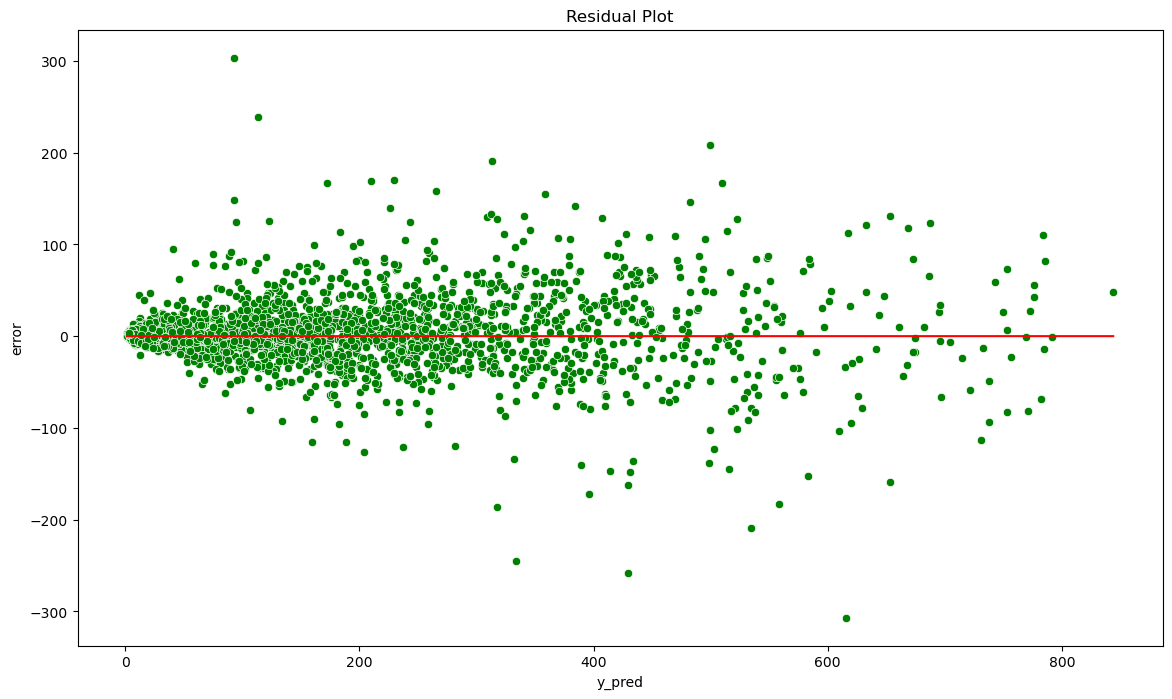

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
# Assuming y_pred, y_test, and y_pred_cat_tuning are defined elsewhere

df_error = pd.DataFrame({
    'y_pred': y_pred,
    'error': (y_test - y_pred_cat_tuning)
})

plt.figure(figsize=(14, 8))
# Scatterplot with green data points
sns.scatterplot(data=df_error, x="y_pred", y="error", color="green")
# Line plot remains red
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

**Residual Plot Analysis**

The residual plot displays the relationship between:

1. Residuals (errors) on the y-axis, representing the difference between the actual and predicted values (
𝑦
test
−
𝑦
pred
y 
test
​
 −y 
pred
​
 ).
2. Predicted values (
𝑦
pred
y 
pred
​
 ) on the x-axis.

**Observations:**

- Cluster Around Zero:
Most of the residuals are tightly clustered around the zero line, indicating that the model predictions are generally close to the actual values.

- Homoskedasticity (Uniform Spread):
The spread of residuals appears relatively consistent across the range of predicted values, with no distinct funnel shape or pattern. This suggests that the error variance is stable and supports the assumption of homoskedasticity.

- Outliers:
A few outliers with larger residuals (positive or negative) indicate instances where the model struggled to make accurate predictions.

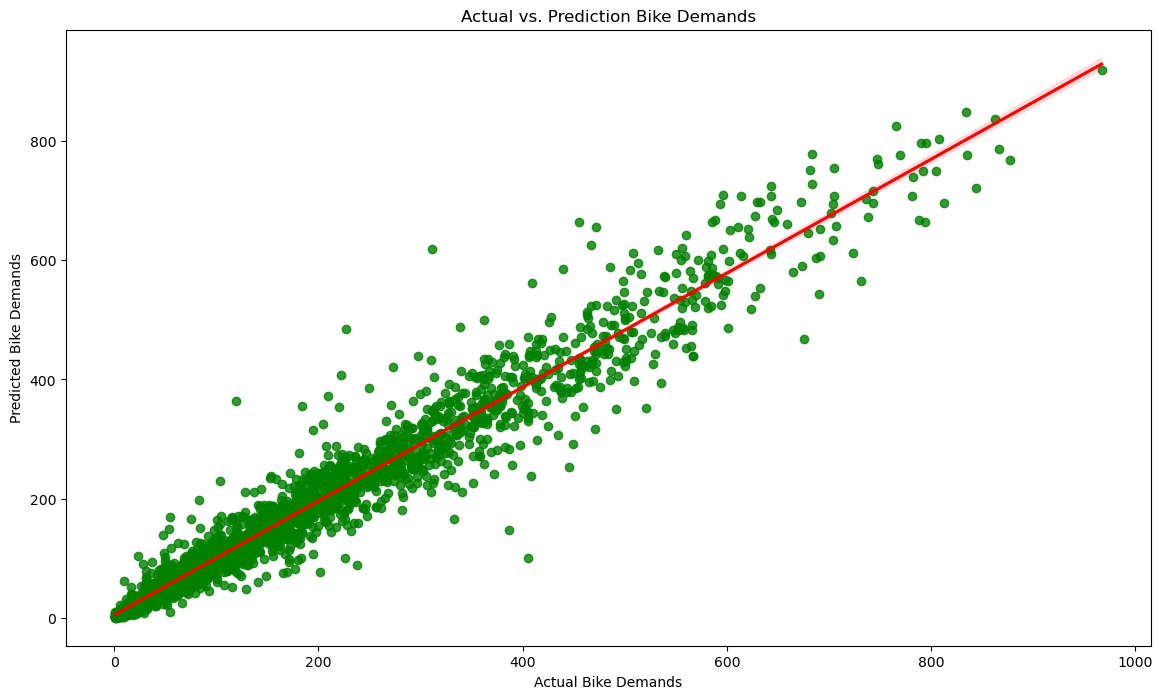

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
# Regplot with scatter points in green and regression line in red
plot = sns.regplot(
    x=y_test, 
    y=y_pred_cat_tuning, 
    scatter_kws={"color": "green"},  # Scatter points in green
    line_kws={"color": "red"}       # Regression line in red
).set(
    title="Actual vs. Prediction Bike Demands", 
    xlabel="Actual Bike Demands", 
    ylabel="Predicted Bike Demands"
)


The strong alignment along the diagonal indicates that predictions closely match actual bike demands for most data points. However, deviations, especially at higher demand levels, suggest that the model may underpredict extreme demands, which could lead to unpreparedness during peak periods.


## Features Importance

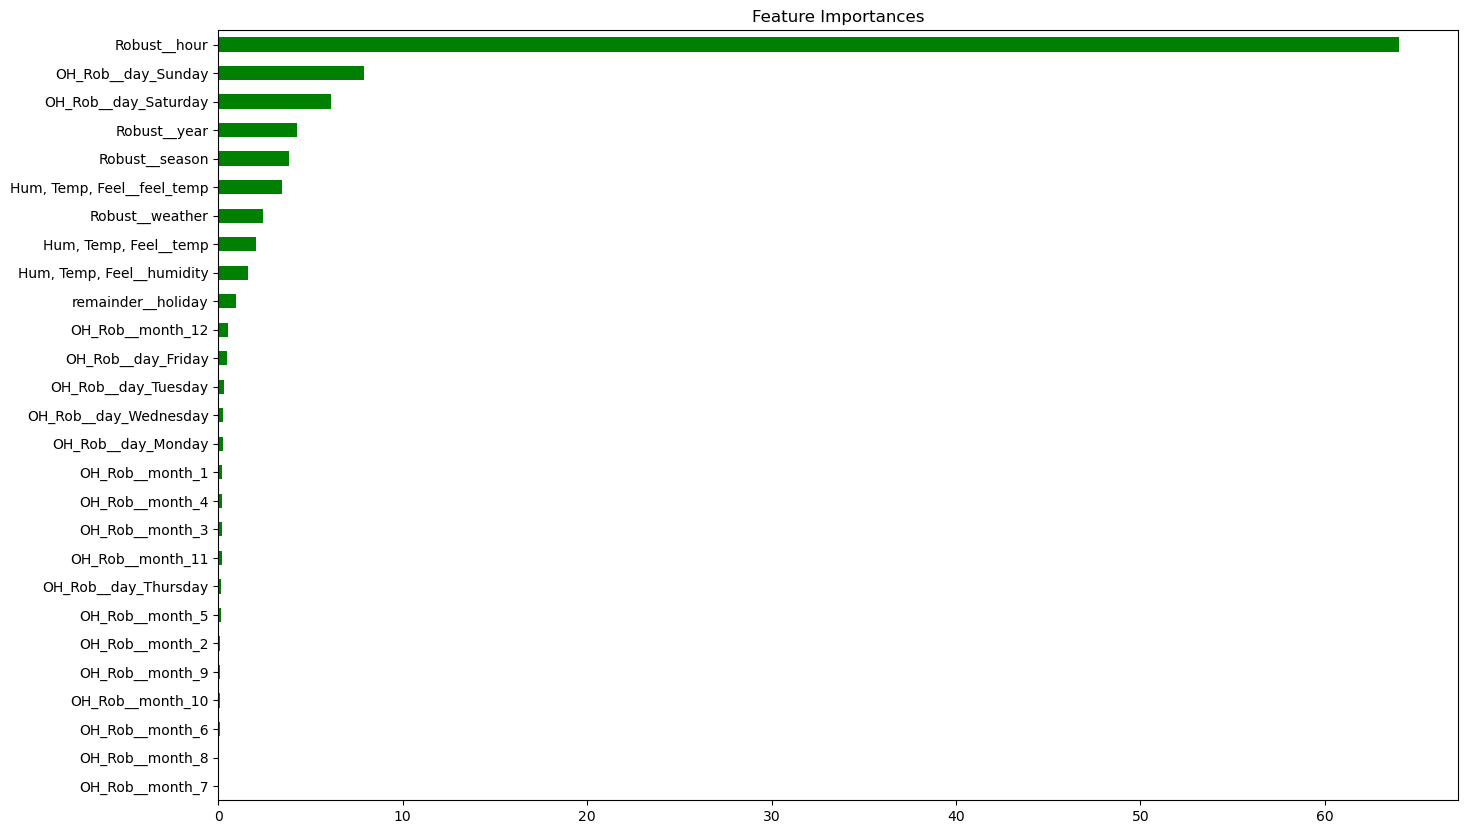

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

underlying_model = cat_tuning["modeling"].regressor_

feature_names = transformer.get_feature_names_out()
    
# Create a Series of feature importances
feature_imp = pd.Series(underlying_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# Assuming `feature_imp` is already defined as in your code
plt.figure(figsize=(16, 10))
feature_imp.sort_values().plot(
    kind="barh", 
    color="green",  # Set bar color to green
    title="Feature Importances"
)
plt.show()

Feature Importance Bar Chart
Key Observations:

The feature Robust__hour dominates the feature importance with the highest bar, indicating that the time of day plays the most significant role in predicting bike demand.
Other notable features include OH_Rob__day_Sunday and OH_Rob__day_Saturday, highlighting that weekends have a significant impact on bike demand.
Weather-related features like Hum_Temp_Feel__feel_temp and Robust__weather are also among the top features, showing that environmental conditions influence demand.
Insights:

The dominance of temporal features like Robust__hour, Robust__year, and Robust__season suggests that bike demand heavily depends on cyclical patterns.
Low-ranking features such as specific months or days of the week (e.g., OH_Rob__month_7) may have limited impact and could be candidates for exclusion in future iterations.

In [46]:
!pip install shap

In [47]:
import shap

col_names=bayes_catsearch.best_estimator_[0].get_feature_names_out()

best_model = bayes_catsearch.best_estimator_["modeling"].regressor_

data = pd.DataFrame(bayes_catsearch.best_estimator_[0].fit_transform(X_train), columns=col_names)

100%|===================| 9699/9720 [06:09<00:00]        

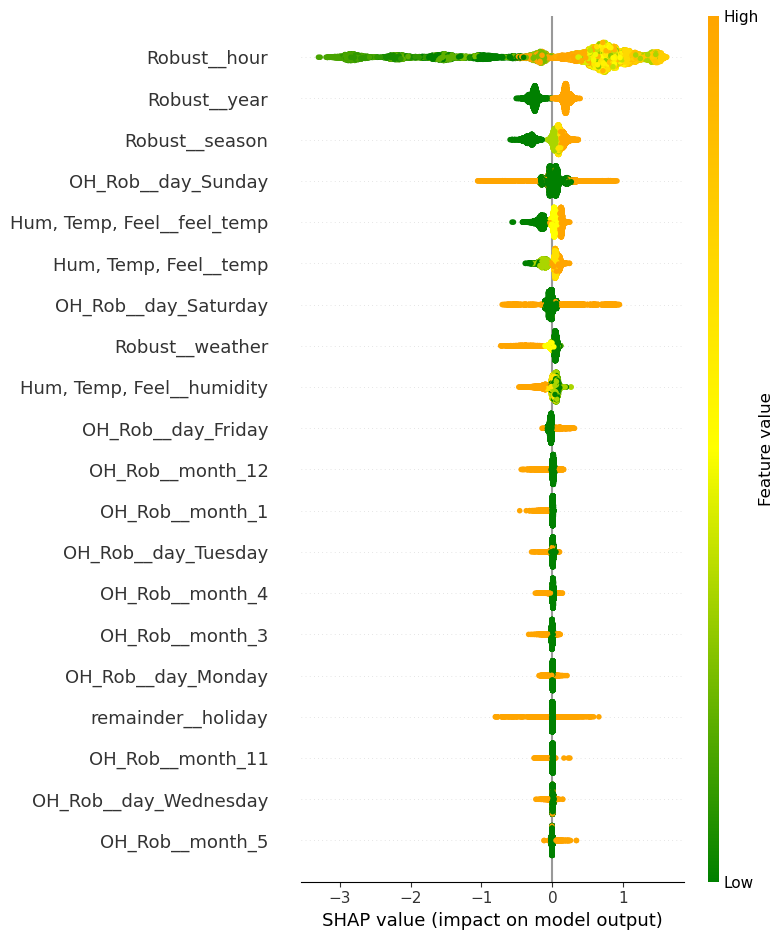

In [48]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define a custom colormap with green and orange/yellow
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", ["green", "yellow", "orange"])

# Define explainer
explainer = shap.TreeExplainer(
    best_model,
    data=data
)

# Count SHAP values for every row in the train data
shap_values = explainer.shap_values(data)

# Apply the custom colormap
shap.summary_plot(shap_values, data, feature_names=feature_names, cmap=custom_cmap)

SHAP Summary Plot
Key Observations:

Similar to the feature importance chart, Robust__hour has the most significant SHAP value spread, meaning it consistently has the largest impact (positive or negative) on predictions.
Robust__year and Robust__season also show substantial influence, aligned with the bar chart results.
Features like Hum_Temp_Feel__feel_temp and Hum_Temp_Feel__temp show both positive and negative contributions, depending on their values, which indicates non-linear relationships with bike demand.
Insights:

High SHAP value spreads for top features confirm their strong predictive power, as they contribute significantly to the model's output.
Features with low SHAP values and little variation likely have minimal or inconsistent impacts on predictions.

Comparative Interpretation
Both plots confirm that Robust__hour is the most critical feature in the model, consistently driving predictions.
Temporal and weather-related features are dominant predictors, reinforcing their importance in understanding bike demand patterns.
Low-impact features in both plots (e.g., specific months) could be refined, aggregated, or excluded to simplify the model without losing predictive power.

## Conclusions

The performance of the CatBoost model directly impacts the target variable, count, which represents the total number of bike rentals (casual and registered users). The model's ability to accurately predict this variable is crucial for achieving the project's objective: optimizing bike availability across Capital Bikeshare (CaBi) stations to improve operational efficiency and user satisfaction.

**Model Performance and Its Effects on the Target Variable**

**1. Prediction Accuracy:**
- The RMSE of 38.12 and MAE of 23.38 indicate that the model can predict bike demand with a reasonable degree of accuracy. However, these errors translate into an average deviation of ~23 bikes per station, which may lead to operational inefficiencies if left unaddressed.
- A MAPE of 23.24% suggests that while the model performs well for moderate demand levels, it struggles with extreme cases, leading to underprediction during high-demand periods (e.g., weekends or events) and overprediction during low-demand times.

**2. Residual and Regression Analysis:**
- The residual plot shows most errors cluster around zero, indicating consistent performance for the majority of scenarios. However, outliers—representing extreme demand spikes—highlight the model's difficulty in accurately capturing edge cases, which are critical for avoiding bike shortages at peak times.
- The actual vs. predicted regression plot demonstrates a strong linear relationship, affirming that the model captures general demand trends effectively. However, deviations in higher demand levels indicate the need for additional refinement.

**3. Feature Importance and SHAP Analysis:**
- The dominance of Robust__hour, Robust__season, and weather-related features indicates that bike demand is heavily influenced by time of day, seasonality, and environmental conditions. This insight reinforces the importance of incorporating temporal and weather data for accurate predictions.
- SHAP analysis confirms that temporal and weather features have the largest impact on predictions, while low-ranking features like specific months have limited predictive power and could be streamlined.

**4. Effect on the Target Variable:**
- Underprediction: During high-demand periods (e.g., weekends, events, or favorable weather), underestimating bike demand could result in insufficient bike availability, frustrating users and reducing ridership.
- Overprediction: Overestimating demand during low-demand times can lead to overstocked stations, inefficient resource use, and unnecessary operational costs.
- Errors in prediction, particularly for high-demand scenarios, directly impact CaBi's ability to meet its operational goals, such as bike redistribution and station balancing.

**Implications for the Project Objective**

The model’s performance, while generally solid, highlights areas that must be addressed to fully optimize bike-sharing operations:

**1. Outliers and Extreme Cases:**
- Inaccuracies during high-demand periods risk bike shortages, undermining user trust and satisfaction.
- Errors in low-demand periods could result in overstocking, leading to inefficiencies.

**2. Feature Insights:**
- Temporal and weather-related features are critical for demand prediction. However, refining low-impact features and exploring feature interactions (e.g., between hour and - weather) could improve prediction accuracy further.

**3. Operational Challenges:**
- The inability to perfectly predict demand across all stations means CaBi must use the model’s forecasts as a baseline while incorporating dynamic real-time adjustments.

## Recommendations

**1. Addressing Outliers:**

- Incorporate external data such as special events, holidays, and traffic patterns to improve predictions during peak times.
Develop ensemble or hybrid models to better handle high-demand scenarios.

**2. Model Refinement:**

- Simplify the model by removing low-impact features (e.g., specific months) and focus on interactions among dominant features.
Explore non-linear relationships further, as SHAP analysis suggests non-linearity in weather-related impacts.

**3. Operational Integration:**

- Deploy the model in real-time systems to dynamically adjust bike redistribution and station balancing.
Use predictive insights to optimize logistics, staffing, and routes for bike rebalancing operations.

**4. Monitoring and Iteration:**

- Regularly evaluate the model’s performance in live conditions and fine-tune it as user behavior and environmental patterns evolve.

## Save Model

In [49]:
import pickle

In [50]:
model_result = bayes_catsearch.best_estimator_

model_result.fit(X, y)

pickle.dump(model_result, open("model_catboost.sav", "wb"))

In [51]:
load_model = pickle.load(open("model_catboost.sav", "rb"))
load_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Hum, Temp, Feel',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  ['humidity', 'temp',
                                                   'feel_temp']),
                                                 ('OH_Rob',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder()),
                                                                  ('Robust',
                                                                   RobustScaler(with_centering=False))]),
                                                  ['day', 'month']),
                                                 ('Robust', RobustScaler(),
                                                  ['weather', 'season', 'hour',
                                                   'year'])])),
                ('modeling',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x000001256B7747D0>))])

In [53]:
import os
file_path = os.path.join(os.getcwd(), "model_catboost.sav")
print(f"Saving model to: {file_path}")
pickle.dump(model_result, open(file_path, "wb"))

Saving model to: c:\Users\PF47J\Downloads\model_catboost.sav
